<h1 style='text-align:center'>Robi Datathon 2.0: Pre-assessment.<h1>


![alt text](img.png "Title")

## Table of Contents
* [Introduction](#chapter1)
* [Import Libraries & Data Collection](#chapter2)
* [Split Dataset](#chapter4)    
* [Data Exploration](#chapter5)    
    * [Missing Data](#section_5_1)
    * [Numerical Column Analysis](#section_5_3)
    * [Categorical Column Analysis](#section_5_4)
* [Data Preparation](#chapter6)    
    * [Remove Outliers](#section_6_1)
    * [Transform Numerical Data](#section_6_2)
    * [Transform Categorical Data](#section_6_3)
* [Model Train & Select](#chapter7)                      
    * [Tune Hyperparameters for Model](#section_8_2)
    * [Cross-Validation on Selected model](#section_8_2)
* [Final Model Build](#chapter10)                   
* [Submission](#chapter9)                

<a class="anchor" id="chapter1"></a> <h2 style='text-align: center'>Introduction</h2>

#### About the dataset
In this pre-assessment round, the task is to predict the label column based on the given features. The dataset contains both categorical and continuous values. Here, the column id is the unique identifier and the rest columns are the features.

#### File description:
**train.csv :** contains the training features along with the id and label column </br>
**test.csv :** this is the testing dataset. You will be predicting the label column for this dataset. You will need the idand your predicted label (0 or 1) column for the submission.</br>
**sample_submission.csv :** a sample submission format, containing 100 rows.
Please note that you have to prepare a file like this for all of the id's in the test dataset.



<a class="anchor" id="chapter2"></a> <h2 style='text-align: center'>Import Libraries & Data Collection</h2>

In [1]:
!pip install missingno
!pip install xgboost

In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # Missing visualization 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.kernel_ridge import KernelRidge

pd.set_option('display.max_columns', None)

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

This code use for kaggle notebook

In [3]:
# train = pd.read_csv('/kaggle/input/robi-datathon-2-pre-assessment/train.csv')
# test = pd.read_csv('/kaggle/input/robi-datathon-2-pre-assessment/test.csv')
# sample_submission = pd.read_csv('/kaggle/input/robi-datathon-2-pre-assessment/sample_submission.csv')

And This code use Jupyter notebook

In [4]:
train = pd.read_csv('robi_train.csv')
test = pd.read_csv('robi_test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [5]:
# Print First Five Row 
train.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,s54,s55,s56,s57,s58,s59,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,,NaN,kK,NaN,NaN,B,NaN,x,op: D,b,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,,NaN,NaN,NaN,NaN,B,NaN,~1,op: D,d,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [6]:
print(f'This dataset have {train.shape[1]} columns\nand {train.shape[0]} rows')

This dataset have 36 columns
and 28322 rows


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28322 non-null  object 
 1   gender  28322 non-null  object 
 2   s11     28322 non-null  object 
 3   s12     28322 non-null  object 
 4   s13     28322 non-null  int64  
 5   s16     28322 non-null  object 
 6   s17     28322 non-null  object 
 7   s18     28322 non-null  object 
 8   s48     28322 non-null  int64  
 9   s52     28322 non-null  object 
 10  s53     28322 non-null  object 
 11  s54     2628 non-null   object 
 12  s55     3206 non-null   object 
 13  s56     0 non-null      float64
 14  s57     0 non-null      float64
 15  s58     28322 non-null  object 
 16  s59     0 non-null      float64
 17  s69     28322 non-null  object 
 18  s70     28322 non-null  object 
 19  s71     28322 non-null  object 
 20  n1      28322 non-null  float64
 21  n2      28322 non-null  float64
 22

<a class="anchor" id="chapter4"></a> <h2 style='text-align: center'>Split Data</h2>

#### Let's dataset split train and validation set.

In [8]:
X, y = train.loc[:, train.columns != 'label'], train['label']

print(f"\nBefore split: {train.shape}")

print("\n\nNow, let's split the train set into train and validation.")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
print(f"\nAfter split train X: {X_train.shape}")
print(f"\nAfter split train y: {y_train.shape}")

print(f"\nAfter split validation X: {X_val.shape}")
print(f"\nAfter split validation y: {y_val.shape}")


Before split: (28322, 36)


Now, let's split the train set into train and validation.

After split train X: (22657, 35)

After split train y: (22657,)

After split validation X: (5665, 35)

After split validation y: (5665,)


##### Just print five random sample on train set

In [9]:
X_train.sample(5)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,s54,s55,s56,s57,s58,s59,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
1899,b'gAAAAABinOiW9rWh8XPYNzX6oBY47JXfZcdUQX3oTXvt...,M,Y,Y,1,C,D,B,1,1,,NaN,NaN,NaN,NaN,B,NaN,C`,op: D,b,6.833544,1.088180,3,5.85324,-33.009206,0.015386,-9.276107,1.487647,2.832026,4.643572,1.672609,0,0,0.859717,0
5112,b'gAAAAABinOid60fc7a9iuwQ6ghMatL2TBX15uAJYQn8S...,M,Y,Y,1,D,D,D,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,d,6.143052,0.930615,6,7.04217,-32.391758,0.017917,-9.208624,1.501396,3.620009,3.971828,1.588699,0,0,0.130626,2
23280,b'gAAAAABinOibPHRol09xbM9z5QTaSXaSAajsHNDeWdPH...,M,Y,Y,1,D,D,B,1,1,,NaN,NaN,NaN,NaN,A,NaN,x,op: D,b,17.240092,2.393501,8,7.36143,-32.334221,0.018957,-8.718871,1.761795,10.912851,10.565458,1.763063,0,0,0.060179,1
18104,b'gAAAAABinOiY6YhGdVbANhq2kJxwChRRmJL0OjfPNv0t...,M,N,Y,1,B,B,C,1,l,,NaN,NaN,NaN,NaN,B,NaN,~1,op: B,c,10.159124,1.440763,1,2.50947,-32.347501,0.029419,-9.245781,1.614905,4.740829,2.964254,1.520028,0,0,0.139758,6
16042,b'gAAAAABinOieYvevJDWiQo-aT96ZsD5nnvhbYECjyRnR...,M,Y,Y,1,D,D,B,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,4.806987,2.069883,3,5.91191,-32.311357,0.022354,-9.242315,1.454289,3.677210,4.532849,1.720758,0,0,0.664278,4


In [10]:
y_train.sample(5)

27637    0
14791    0
24939    0
2721     1
5020     0
Name: label, dtype: int64

<a class="anchor" id="chapter5"></a>  <h2 style='text-align: center'>Data Exploration</h2> 

**We'll be only exploring our new split train data set. The validation set and test set would not be explored Because it's our future data. So, We don't know about future data..**

### Missing Data <a class="anchor" id="section_5_1"></a>

In [11]:
print('The number of data that are missing from the X_train:', X_train.isnull().sum().sum())

The number of data that are missing from the X_train: 108628


In [12]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [13]:
missing_values_table(X_train)

Your selected dataframe has 35 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
s56,22657,100.0
s57,22657,100.0
s59,22657,100.0
s54,20580,90.8
s55,20077,88.6


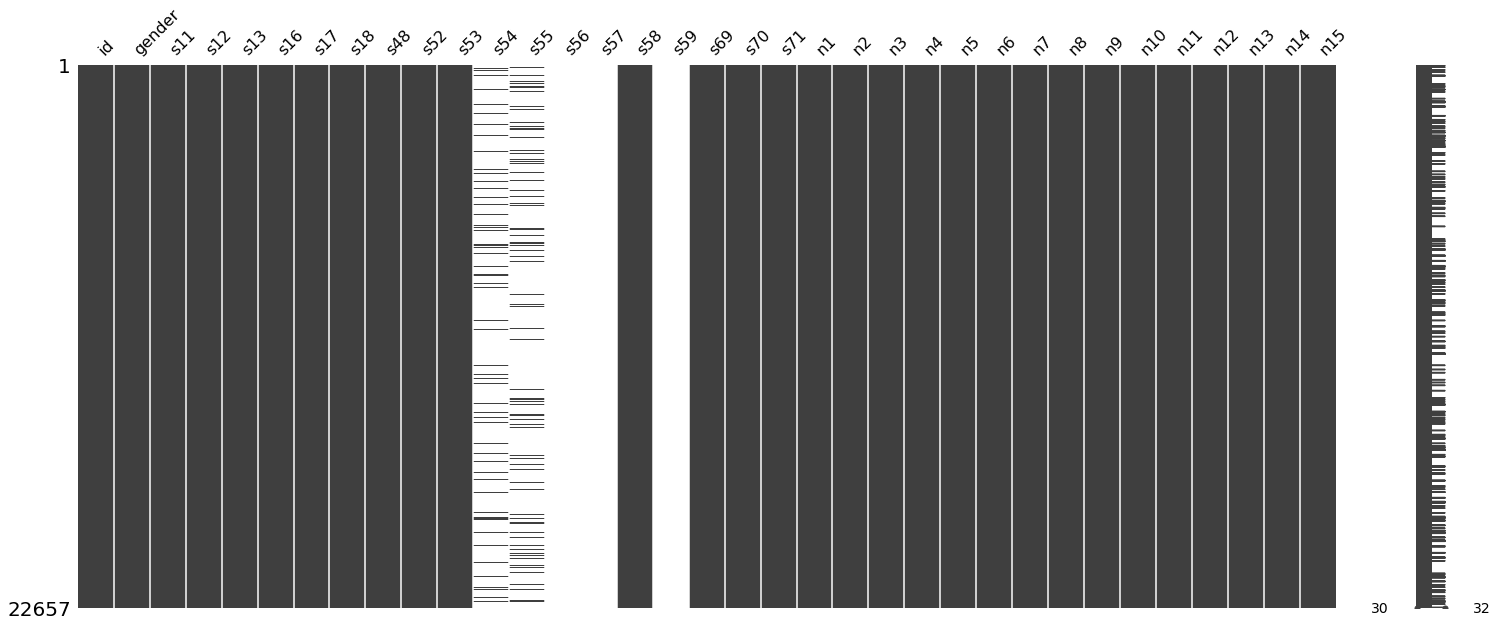

In [14]:
msno.matrix(X_train)
plt.show()

1. There are 108619 missing data exist in X_train.
2. s56, s57, s59 are totally null.
3. Columns s54 and s45 are 90 percent and 88 percent null.

### Numerical Column Analysis.  <a class="anchor" id="section_5_3"></a>

Make without null columns Data Frame.

In [15]:
without_null = X_train[X_train.columns[~X_train.isnull().any()]]

Distribution of X_train data

In [16]:
without_null.describe().T.style.background_gradient(cmap='YlOrRd', axis=None)

,count,mean,std,min,25%,50%,75%,max
s13,22657.000000,0.982963,0.129411,0.000000,1.000000,1.000000,1.000000,1.000000
s48,22657.000000,0.434612,0.495717,0.000000,0.000000,0.000000,1.000000,1.000000
n1,22657.000000,10.204424,4.418281,2.207756,6.590339,9.515144,14.450108,20.882733
n2,22657.000000,1.599901,0.665612,0.311727,1.012483,1.462928,2.195420,3.137331
n3,22657.000000,4.820938,2.201399,0.000000,3.000000,5.000000,7.000000,9.000000
n4,22657.000000,5.081905,2.273332,1.785047,2.838433,4.838389,7.296514,8.594620
n5,22657.000000,-32.641312,0.241024,-33.167589,-32.862105,-32.577055,-32.396760,-32.289180
n6,22657.000000,0.014993,0.006530,0.000584,0.009213,0.016031,0.018730,0.029981
n7,22657.000000,-9.106890,0.205471,-9.517986,-9.258648,-9.173449,-8.962537,-8.586583
n8,22657.000000,1.612256,0.173136,1.178469,1.490164,1.537806,1.730390,2.173307


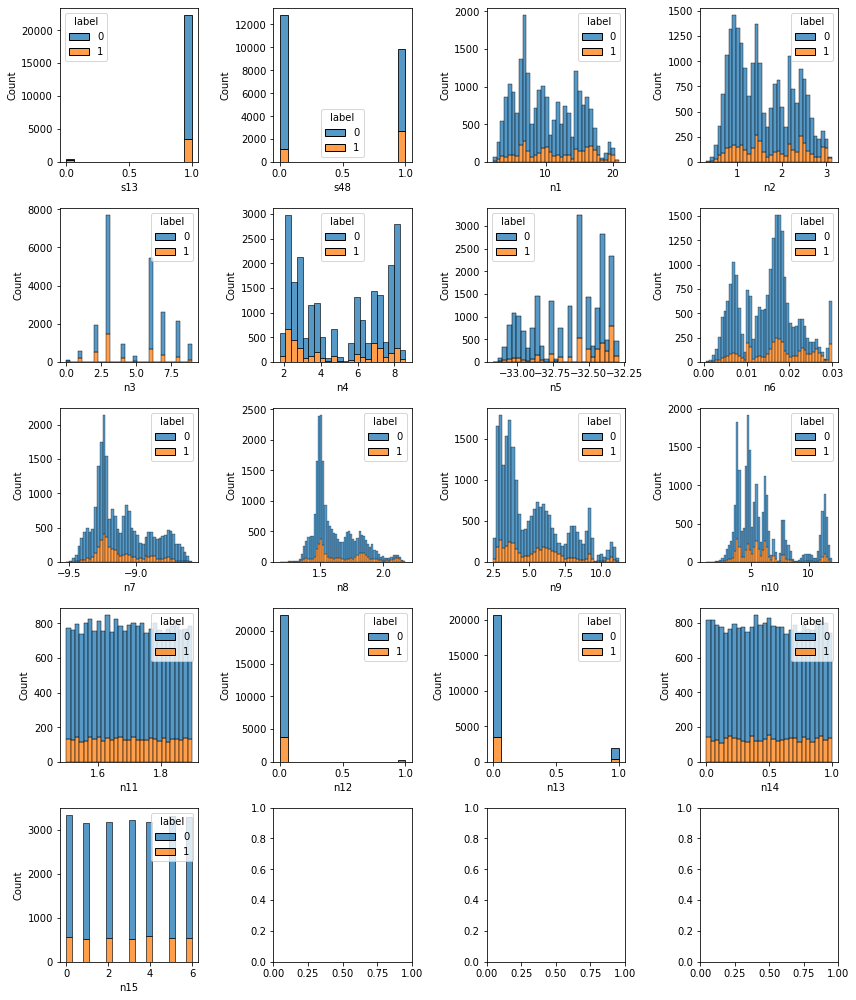

In [17]:
names = list(without_null.select_dtypes(exclude=['object']).nunique().keys())

fig, axes = plt.subplots(5, 4, figsize=(12, 14))

for i,t in zip(names, axes.flatten()):
    sns.histplot(x=i, data=X_train, ax=t, multiple="stack", hue=y_train)    

fig.tight_layout()
plt.show()

### Categorical Column Analysis.  <a class="anchor" id="section_5_4"></a>


Print number of uniqe values in categorical columns

In [18]:
without_null.select_dtypes(include=['object']).nunique()

id        22657
gender        2
s11           2
s12           2
s16           4
s17           4
s18           4
s52           4
s53           2
s58           2
s69           4
s70           4
s71           4
dtype: int64

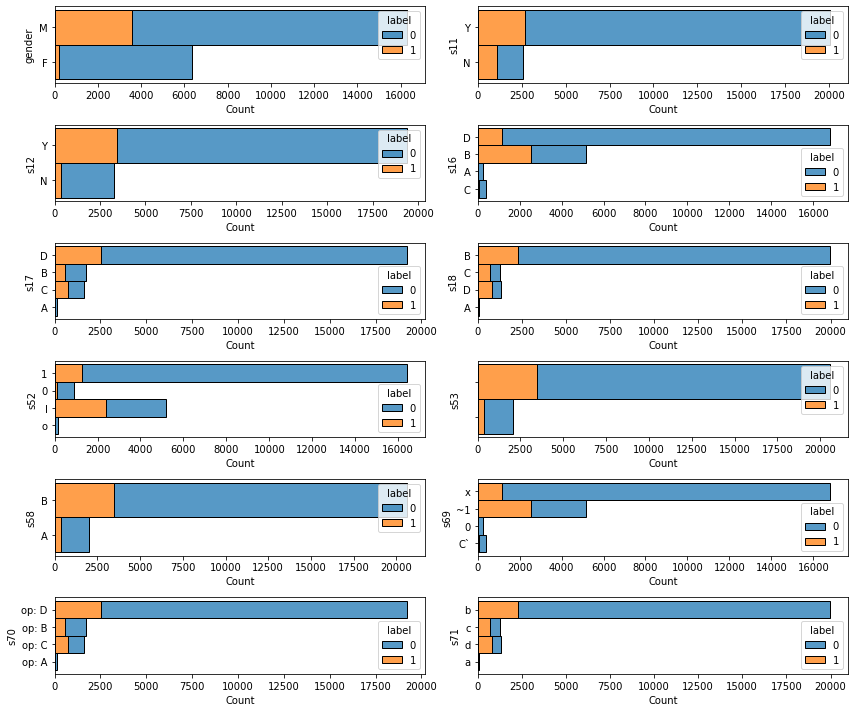

In [19]:
names = list(without_null.select_dtypes(include=['object']).nunique().keys())[1:]

fig, axes = plt.subplots(6, 2, figsize=(12, 10))

for i,t in zip(names, axes.flatten()):
    sns.histplot(y=i, data=X_train, ax=t, multiple="stack", hue=y_train)    

fig.tight_layout()
plt.show()

<a class="anchor" id="chapter6"></a>  <h2 style='text-align: center'>Data Preparation</h2> 

#### Transform Numerical Data <a class="anchor" id="section_6_2"></a>

In [20]:
def trainform_numerical_data(data):
    df = data.copy()
    est = KBinsDiscretizer(n_bins=2, encode='ordinal', strategy='kmeans')

    for i in df.select_dtypes(exclude=['object']):    
        df[i] = est.fit_transform(df[i].values.reshape(-1, 1))
    return df

In [21]:
def trainform_categorical_data(data):
    df = data.copy()    
    
    categorical_columns = df.select_dtypes(include=['object'])    
    
    for i in list(categorical_columns.iloc[:, 1:].columns):
        le = LabelEncoder()
        df[i] =  le.fit_transform(df[i]).astype('int64')
    
    return df

In [22]:
def data_preparation(data_frame):        
    df = 0
    df = data_frame.copy()
    df = df[df.columns[~df.isnull().any()]]
    
    # Transform numarical data
    df = trainform_numerical_data(df)        
    
    # Transform categorical data
    df = trainform_categorical_data(df)    
            
    return df

In [23]:
X_train = data_preparation(X_train)

In [24]:
X_val = data_preparation(X_val)

 <a class="anchor" id="chapter7"></a>  <h2 style='text-align: center'>Model Train & Select</h2> 

In [25]:
def model_pipe(model, x, y, x_test, y_test):
    
    pipeline = Pipeline(steps = [            
            ('selector', SelectKBest(mutual_info_classif, k=20)),
            ('classifier', model)              
           ])

    model = pipeline.fit(x, y)
    return model.score(x_test, y_test)    

In [26]:
pipelines = []
pipelines.append(('Gradient Boosting Classifier' , (Pipeline([('scaled' , StandardScaler()), ('GBC' ,GradientBoostingClassifier())]))))
pipelines.append(('Extreme Gradient Boosting Classifier' , (Pipeline([('scaled' , StandardScaler()),('GBC' , xgb.XGBClassifier())]))))
pipelines.append(('Random Forest Classifier' , (Pipeline([('scaled' , StandardScaler()),('RFC' ,RandomForestClassifier())]))))
pipelines.append(('Logistic Regression' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('Decision Tree Classifier' , (Pipeline([('scaled' , StandardScaler()),('DTC' ,DecisionTreeClassifier())]))))

In [27]:
model_name = []
results = []
print('Test On validation set\n')
for pipe ,model in pipelines:       
    print("{}: {:.2f}".format(pipe, model_pipe(model, X_train.iloc[:,1:], y_train, X_val.iloc[:,1:], y_val)*100))

Test On validation set

Gradient Boosting Classifier: 87.20
Extreme Gradient Boosting Classifier: 86.60
Random Forest Classifier: 86.25
Logistic Regression: 87.01
Decision Tree Classifier: 85.86


#### Tune Hyperparameters for Model <a class="anchor" id="section_8_2"></a>

In [28]:
parameters = {
    "n_estimators":[50,250,32],
    "max_depth":[1,3],
    "learning_rate":[0.01,0.1,1,10]
}

gbc = GradientBoostingClassifier()

In [29]:
cv = GridSearchCV(gbc,parameters,cv=5)
cv.fit(X_train.iloc[:,1:],y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [1, 3], 'n_estimators': [50, 250, 32]})

In [30]:
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

In [31]:
cv = GradientBoostingClassifier(n_estimators= 50, max_depth=3, learning_rate=0.1)

In [32]:
cv.fit(X_train.iloc[:,1:],y_train)

GradientBoostingClassifier(n_estimators=50)

In [33]:
y_pred = cv.predict(X_val.iloc[:,1:])

In [34]:
accuracy_score(y_pred, y_val)

0.8739629302736099

1. Here, We look at Gradient Boosting Classifier are get good performance from other models.
2. We also find best parameter for Gradient Boosting. 

#### Cross-Validation on Selected model <a class="anchor" id="section_8_2"></a>

In [35]:
X = data_preparation(X)

In [36]:
y

0        0
1        1
2        0
3        0
4        0
        ..
28317    0
28318    0
28319    0
28320    0
28321    0
Name: label, Length: 28322, dtype: int64

In [ ]:
cv_results = {}
for pipe ,model in pipelines: 
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
    cv_results[pipe] = cross_val_score(model, X.iloc[:,1:], y, cv=cv, scoring=('accuracy')) * 100
pd.DataFrame(cv_results)

1. In the entire dataset, Gradient Boosting and Logistic Regression have gotten the best performance.

<a class="anchor" id="chapter10"></a> <h2 style='text-align: center'>Final Model Train</h2>

In [ ]:
gbc = GradientBoostingClassifier(n_estimators= 50, max_depth=3, learning_rate=0.1)

X is already pre-processed.

In [ ]:
gbc.fit(X.iloc[:,1:], y)

Our model has been trained. Now we predict our target based on the test dataset.

<a class="anchor" id="chapter9"></a> <h2 style='text-align: center'>Submission</h2>

First we need test data transformation

In [ ]:
test = data_preparation(test)

Predict test data on our model

In [ ]:
y_pred =  gbc.predict(test.iloc[:,1:])

In [ ]:
y_pred[:5]

Let's look sample submission file for create our submission file

In [ ]:
sample_submission.head()

In [ ]:
submission = test[['id']]

In [ ]:
submission['label'] = y_pred

In [ ]:
submission.head()

Our file save as submission.csv without index

In [ ]:
submission.to_csv('submission.csv', index=False)

<a class="anchor" id="chapter9"></a> <h2 style='text-align: center'>The End</h2>